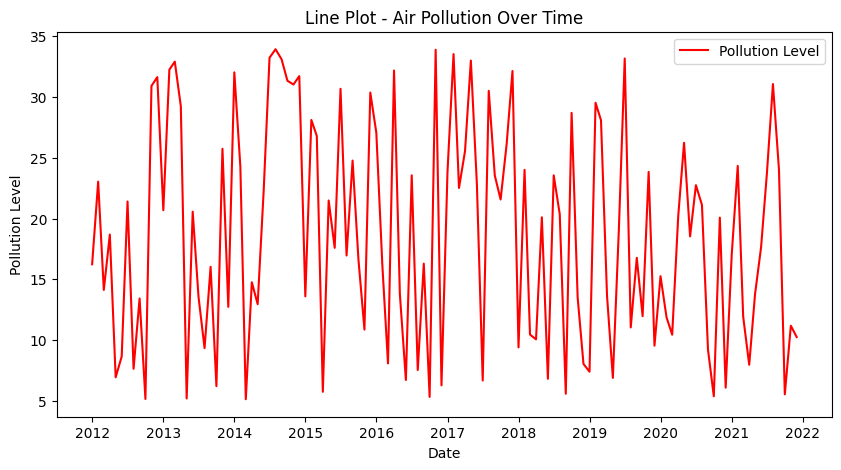

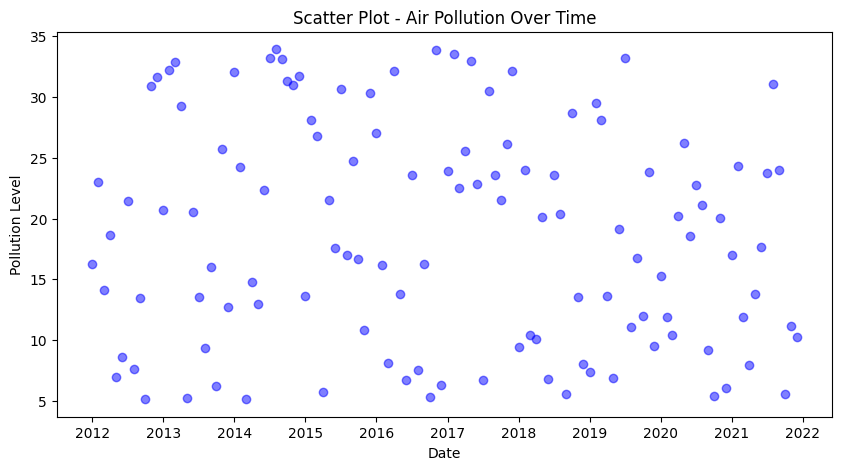

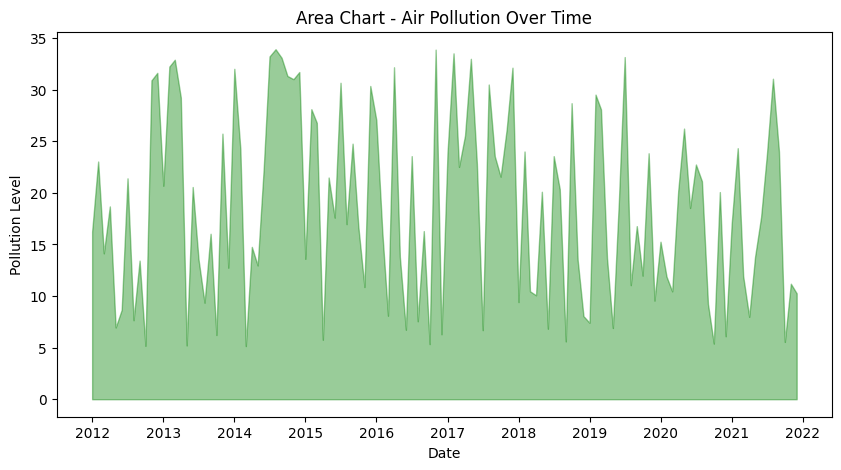

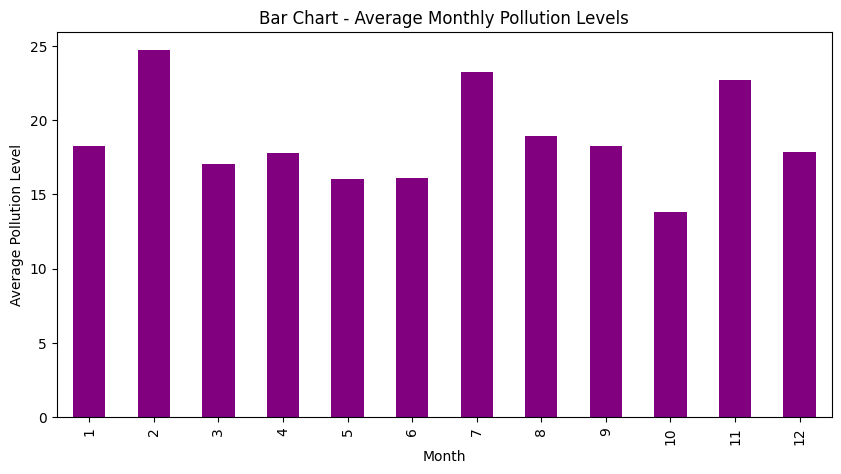

<ipython-input-5-4055b3cdc1a5>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df.index.year, y=df[pollution_col], palette="coolwarm")


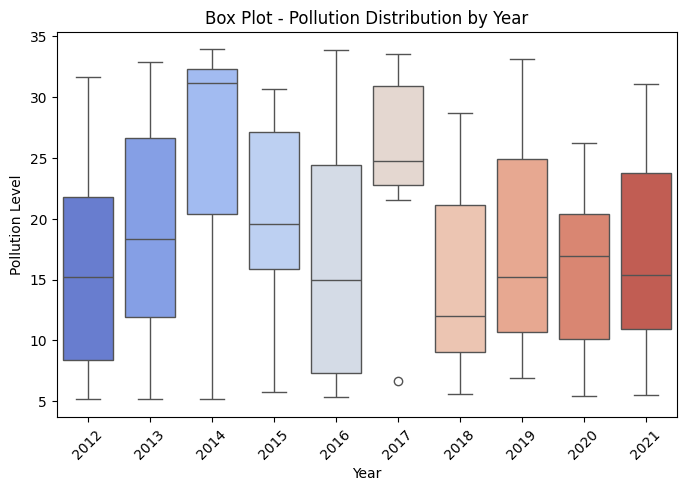

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/us_air_pollution_2012_2021_updated.csv")

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Select the pollution column (update the name if different)
pollution_col = "PM2.5 (µg/m³)"  # Update based on actual column name

# Filter data for 2012-2021
df = df[(df['Date'].dt.year >= 2012) & (df['Date'].dt.year <= 2021)]

# Remove outliers using IQR method
Q1 = df[pollution_col].quantile(0.25)
Q3 = df[pollution_col].quantile(0.75)
IQR = Q3 - Q1
df = df[(df[pollution_col] >= (Q1 - 1.5 * IQR)) & (df[pollution_col] <= (Q3 + 1.5 * IQR))]

# Set Date as index for plotting
df.set_index('Date', inplace=True)

# Plot 1: Line Plot
plt.figure(figsize=(10, 5))
plt.plot(df.index, df[pollution_col], color='red', label="Pollution Level")
plt.xlabel("Date")
plt.ylabel("Pollution Level")
plt.title("Line Plot - Air Pollution Over Time")
plt.legend()
plt.show()

# Plot 2: Scatter Plot
plt.figure(figsize=(10, 5))
plt.scatter(df.index, df[pollution_col], color='blue', alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Pollution Level")
plt.title("Scatter Plot - Air Pollution Over Time")
plt.show()

# Plot 3: Area Chart
plt.figure(figsize=(10, 5))
plt.fill_between(df.index, df[pollution_col], color='green', alpha=0.4)
plt.xlabel("Date")
plt.ylabel("Pollution Level")
plt.title("Area Chart - Air Pollution Over Time")
plt.show()

# Plot 4: Bar Chart (Monthly Average)
df['Month'] = df.index.month
monthly_avg = df.groupby("Month")[pollution_col].mean()
monthly_avg.plot(kind="bar", color='purple', figsize=(10, 5))
plt.xlabel("Month")
plt.ylabel("Average Pollution Level")
plt.title("Bar Chart - Average Monthly Pollution Levels")
plt.show()

# Plot 5: Box Plot (Pollution Distribution)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df.index.year, y=df[pollution_col], palette="coolwarm")
plt.xlabel("Year")
plt.ylabel("Pollution Level")
plt.title("Box Plot - Pollution Distribution by Year")
plt.xticks(rotation=45)
plt.show()
